Дана статистика пользователей adult.csv.
Получите значения AUC для различных моделей и их параметров. Попробуйте построить модель с улучшенным значением AUC, чем в примерах на занятии.

In [1]:
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
data = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
# попробуем выбрать какие-нибудь признаки
selectedColumns = data[ [ 'age','workclass', 'education','educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'] ]

# переведем категориальные перменные в 0 и 1, добавив столбцы с соответствующими названиями
X = pd.get_dummies(selectedColumns, columns = ['workclass', 'education',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'native-country'] )

In [4]:
# заменим доход "50K" на 1, "<=50K" на 0
data.income.replace(['>50K', '<=50K'], [1, 0], inplace=True)

y = data['income']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.3, random_state=42)

In [6]:
scaler = StandardScaler()

In [7]:
x_scaled = scaler.fit(x_train)
X_train_scaled=  x_scaled.transform(x_train)
X_test_scaled=  x_scaled.transform(x_test)

In [8]:
model = LogisticRegression()

In [9]:
model.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
model.score(X_test_scaled, y_test)

0.8545690302327168

In [11]:
y_test_predict = model.predict_proba(X_test_scaled)

In [13]:
roc_auc_score(y_test,y_test_predict[:,1])

0.906511328079442

In [15]:
fpr, tpr, thres = roc_curve(y_test, y_test_predict[:,1] )

In [16]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


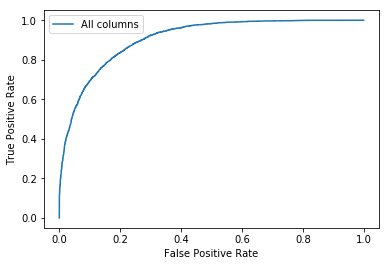

In [17]:
plt.plot(fpr,tpr, label = 'All columns')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

In [18]:
# построим одну простую модель на двух числовых измерениях - age,educational-num

In [19]:
x_train_short = x_train[['age','educational-num']]
x_test_short = x_test[['age','educational-num']]

In [20]:
x_scaled_short = scaler.fit(x_train_short)
X_train_scaled_short=  x_scaled.transform(x_train_short)
X_test_scaled_short =  x_scaled.transform(x_test_short)

In [22]:
model.fit(X_train_scaled_short, y_train)
y_test_predict = model.predict_proba(X_test_scaled_short)
fpr2, tpr2, thres2 = roc_curve(y_test, y_test_predict[:,1] )

roc_auc_score(y_test,y_test_predict[:,1])

0.7732393265929031

In [23]:
# и немного более умную регрессию с помощью GridSearchCV с параметром регуляризации С таким, чтобы получить максимальный roc_auc

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
grid = {'C':[0.01, 0.1, 1, 10, 100]}

In [26]:
gridsearch = GridSearchCV(LogisticRegression(), grid, scoring='roc_auc',cv=5)
gridsearch.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='roc_auc', verbose=0)

In [27]:
gridsearch.best_params_

{'C': 0.1}

In [28]:
model = LogisticRegression(C =0.1)

In [31]:
model.fit(X_train_scaled, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
y_test_predict = model.predict_proba(X_test_scaled)
fpr3, tpr3, thres3 = roc_curve(y_test, y_test_predict[:,1])
roc_auc_score(y_test,y_test_predict[:,1])

0.9065726872197098

In [101]:
# посмотрим на все 3 варианты вместе
# PS. оптимизированный параметр регуляризации существенно ничего не изменил

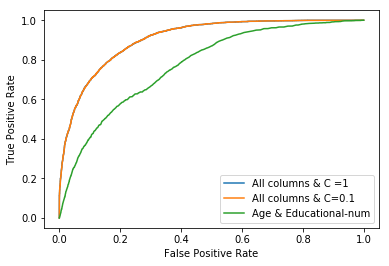

In [37]:
plt.plot(fpr,tpr, label = 'All columns & C =1')
plt.plot(fpr3,tpr3, label = 'All columns & C=0.1')
plt.plot(fpr2,tpr2, label = 'Age & Educational-num')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()